<a href="https://colab.research.google.com/github/hemoabdullah/PCVK_smst5/blob/main/Week5_Hammam_Abdullah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

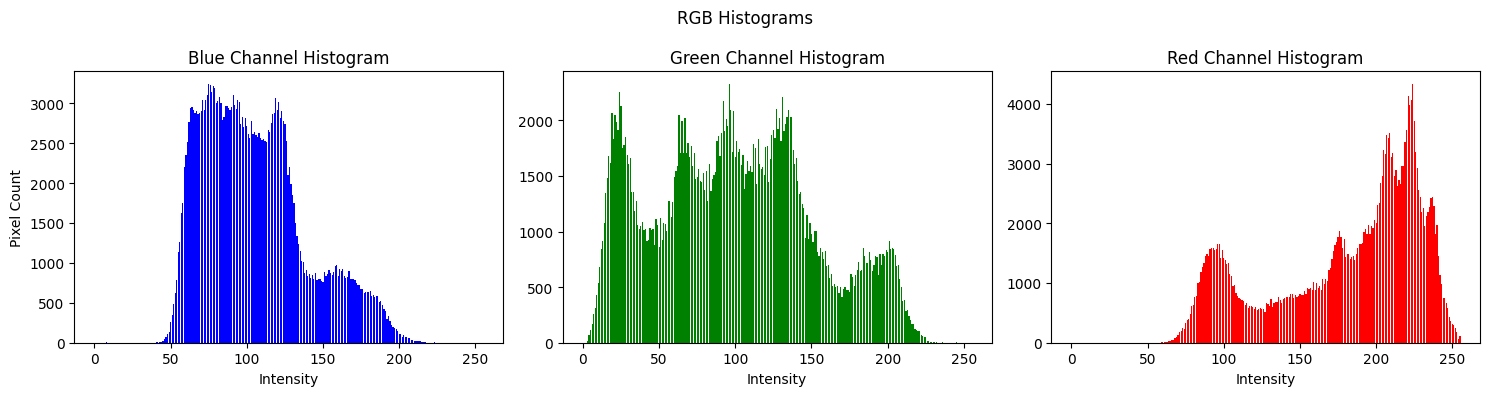

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Image/Lenna_(test_image).png')

b_hist = np.zeros(256)
g_hist = np.zeros(256)
r_hist = np.zeros(256)

height, width, _ = img.shape

for y in range(height):
  for x in range(width):
    b_val = img[y, x][0]
    g_val = img[y, x][1]
    r_val = img[y, x][2]
    b_hist[b_val] += 1
    g_hist[g_val] += 1
    r_hist[r_val] += 1

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.bar(range(256), b_hist, color='blue')
plt.title('Blue Channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Pixel Count')


plt.subplot(1, 3, 2)
plt.bar(range(256), g_hist, color='green')
plt.title('Green Channel Histogram')
plt.xlabel('Intensity')


plt.subplot(1, 3, 3)
plt.bar(range(256), r_hist, color='red')
plt.title('Red Channel Histogram')
plt.xlabel('Intensity')

plt.suptitle('RGB Histograms')
plt.tight_layout()
plt.show()


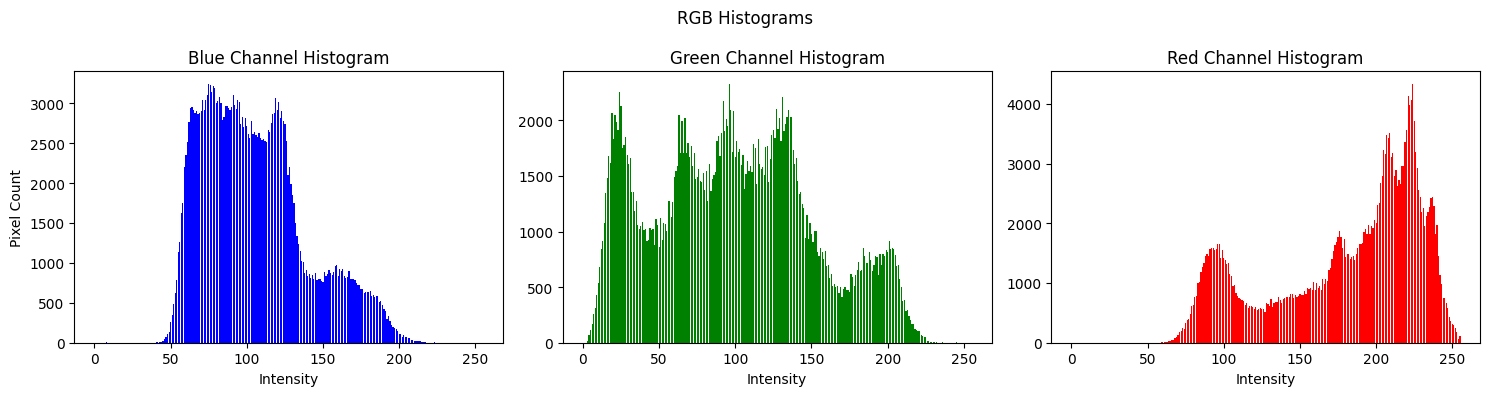

In [ ]:
img1 = cv.imread('/content/drive/MyDrive/PCVK/Image/Lenna_(test_image).png')

b_img1 = cv.split(img1)[0]
g_img1 = cv.split(img1)[1]
r_img1 = cv.split(img1)[2]

hist_b = np.histogram(b_img1, bins=256, range=(0, 256))
hist_g = np.histogram(g_img1, bins=256, range=(0, 256))
hist_r = np.histogram(r_img1, bins=256, range=(0, 256))

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.bar(range(256), hist_b[0], color='blue')
plt.title('Blue Channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Pixel Count')


plt.subplot(1, 3, 2)
plt.bar(range(256), hist_g[0], color='green')
plt.title('Green Channel Histogram')
plt.xlabel('Intensity')


plt.subplot(1, 3, 3)
plt.bar(range(256), hist_r[0], color='red')
plt.title('Red Channel Histogram')
plt.xlabel('Intensity')

plt.suptitle('RGB Histograms')
plt.tight_layout()
plt.show()

Original Image vs. Equalized Image


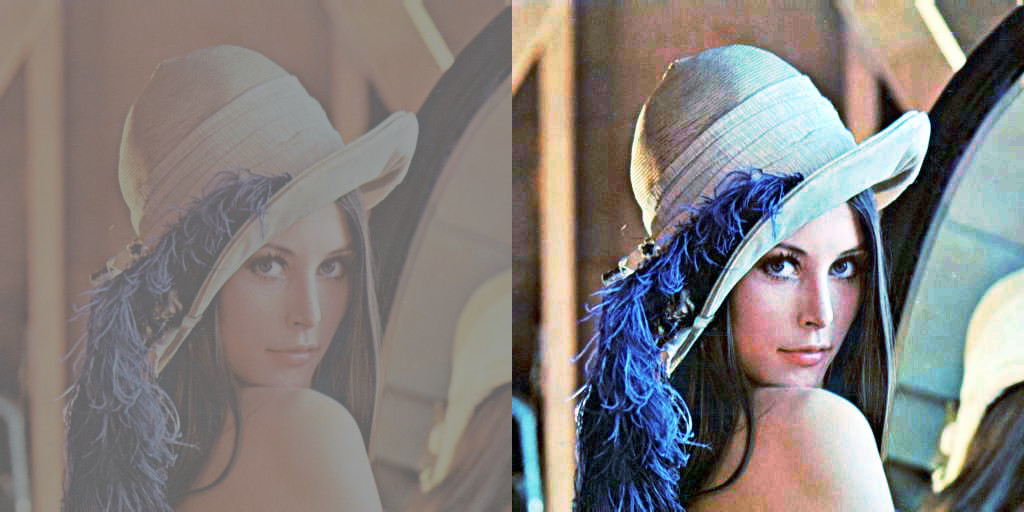

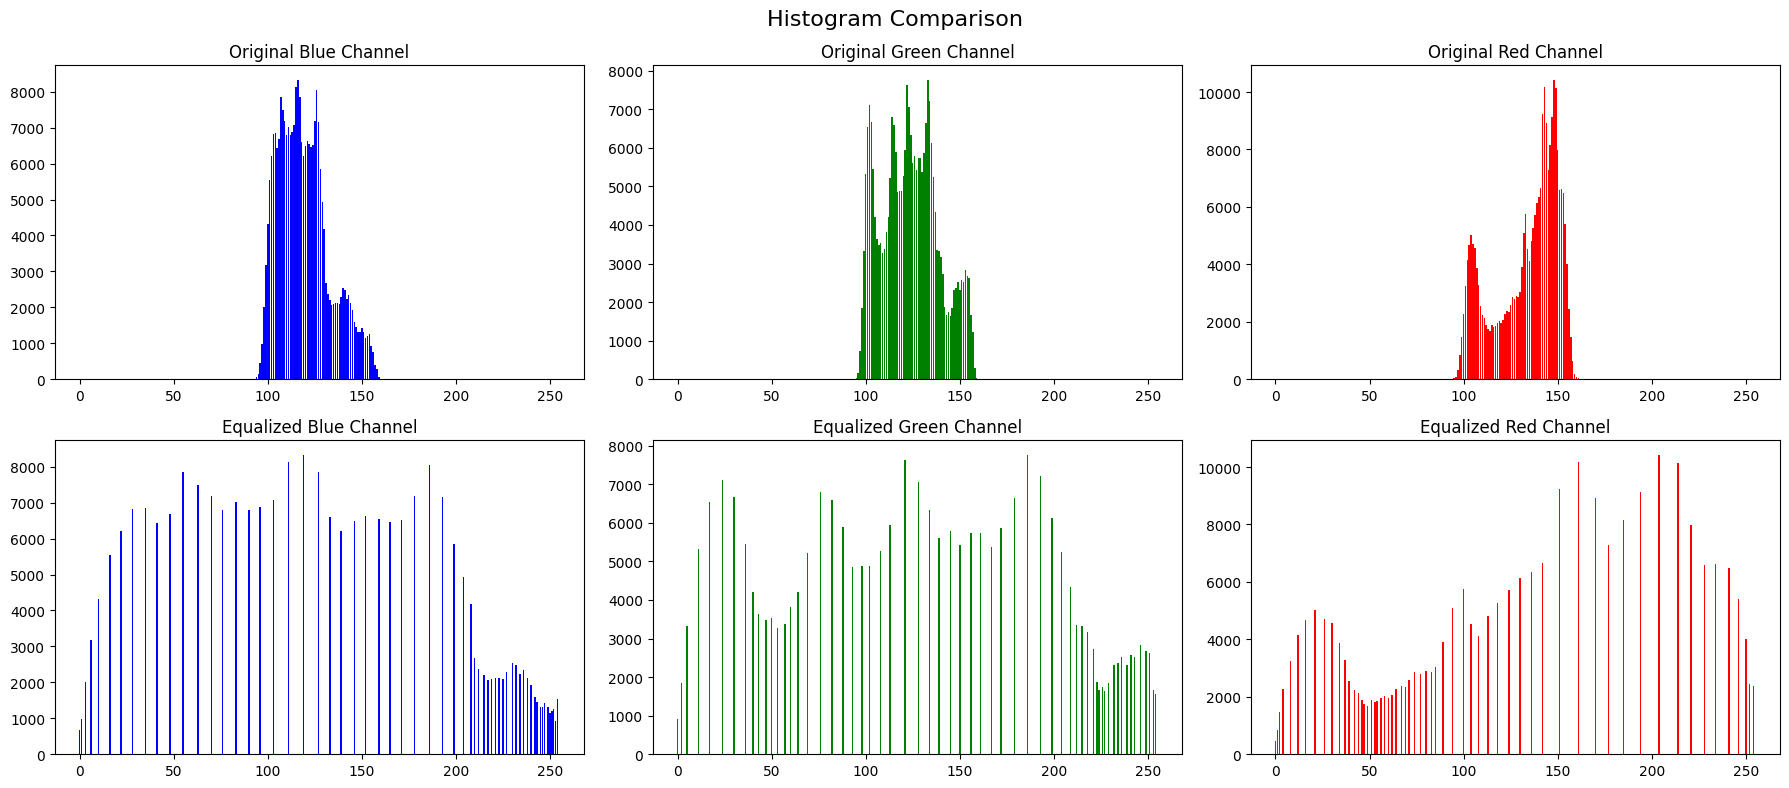

In [ ]:
img2 = cv.imread('/content/drive/MyDrive/PCVK/Image/lena_lc.jpg')

b, g, r = cv.split(img2)


hist, bins = np.histogram(img2.flatten(), 256, [0, 256])
cdf = hist.cumsum()

hist_b_lc = cv.calcHist([b], [0], None, [256], [0, 256])
hist_g_lc = cv.calcHist([g], [0], None, [256], [0, 256])
hist_r_lc = cv.calcHist([r], [0], None, [256], [0, 256])

cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')

cdf_b = np.cumsum(hist_b_lc)
cdf_g = np.cumsum(hist_g_lc)
cdf_r = np.cumsum(hist_r_lc)

cdf_b_masked = np.ma.masked_equal(cdf_b, 0)
cdf_g_masked = np.ma.masked_equal(cdf_g, 0)
cdf_r_masked = np.ma.masked_equal(cdf_r, 0)

cdf_b_norm = (cdf_b_masked - cdf_b_masked.min()) * 255 / (cdf_b_masked.max() - cdf_b_masked.min())
cdf_g_norm = (cdf_g_masked - cdf_g_masked.min()) * 255 / (cdf_g_masked.max() - cdf_g_masked.min())
cdf_r_norm = (cdf_r_masked - cdf_r_masked.min()) * 255 / (cdf_r_masked.max() - cdf_r_masked.min())

lut_b = np.ma.filled(cdf_b_norm, 0).astype('uint8')
lut_g = np.ma.filled(cdf_g_norm, 0).astype('uint8')
lut_r = np.ma.filled(cdf_r_norm, 0).astype('uint8')

b_equalized = cv.LUT(b, lut_b)
g_equalized = cv.LUT(g, lut_g)
r_equalized = cv.LUT(r, lut_r)

img_equalized = cv.merge((b_equalized, g_equalized, r_equalized))

final_frame = cv.hconcat((img2, img_equalized))
print("Original Image vs. Equalized Image")
cv2_imshow(final_frame)


hist_b_eq = cv.calcHist([b_equalized], [0], None, [256], [0, 256])
hist_g_eq = cv.calcHist([g_equalized], [0], None, [256], [0, 256])
hist_r_eq = cv.calcHist([r_equalized], [0], None, [256], [0, 256])

plt.figure(figsize=(18, 8))
plt.suptitle('Histogram Comparison', fontsize=16)


plt.subplot(2, 3, 1)
plt.bar(range(256), hist_b_lc.flatten(), color='b')
plt.title('Original Blue Channel')


plt.subplot(2, 3, 2)
plt.bar(range(256), hist_g_lc.flatten(), color='g')
plt.title('Original Green Channel')


plt.subplot(2, 3, 3)
plt.bar(range(256), hist_r_lc.flatten(), color='r')
plt.title('Original Red Channel')

plt.subplot(2, 3, 4)
plt.bar(range(256), hist_b_eq.flatten(), color='b')
plt.title('Equalized Blue Channel')


plt.subplot(2, 3, 5)
plt.bar(range(256), hist_g_eq.flatten(), color='g')
plt.title('Equalized Green Channel')


plt.subplot(2, 3, 6)
plt.bar(range(256), hist_r_eq.flatten(), color='r')
plt.title('Equalized Red Channel')

plt.tight_layout()
plt.show()
plt.show()

Original Image (Left) vs. Equalized Image using cv2.equalizeHist (Right):


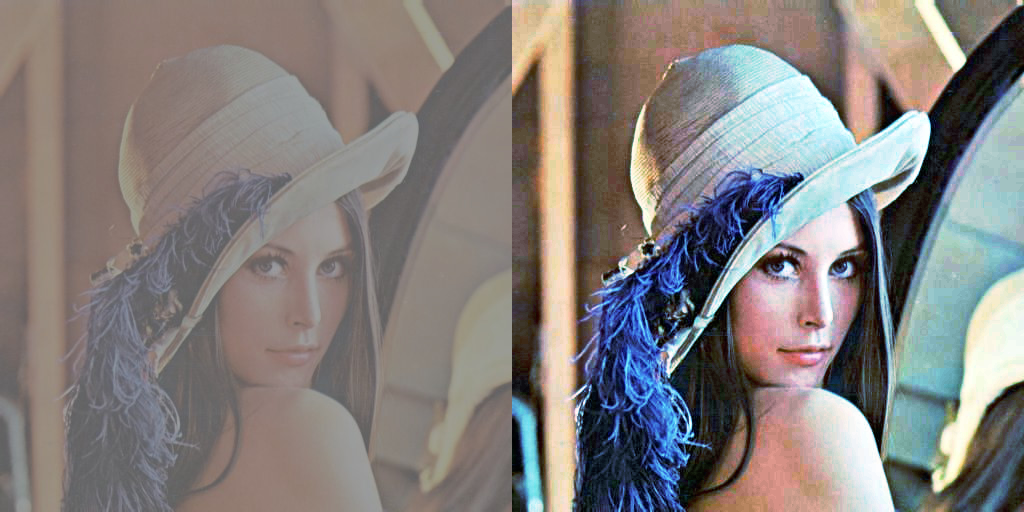

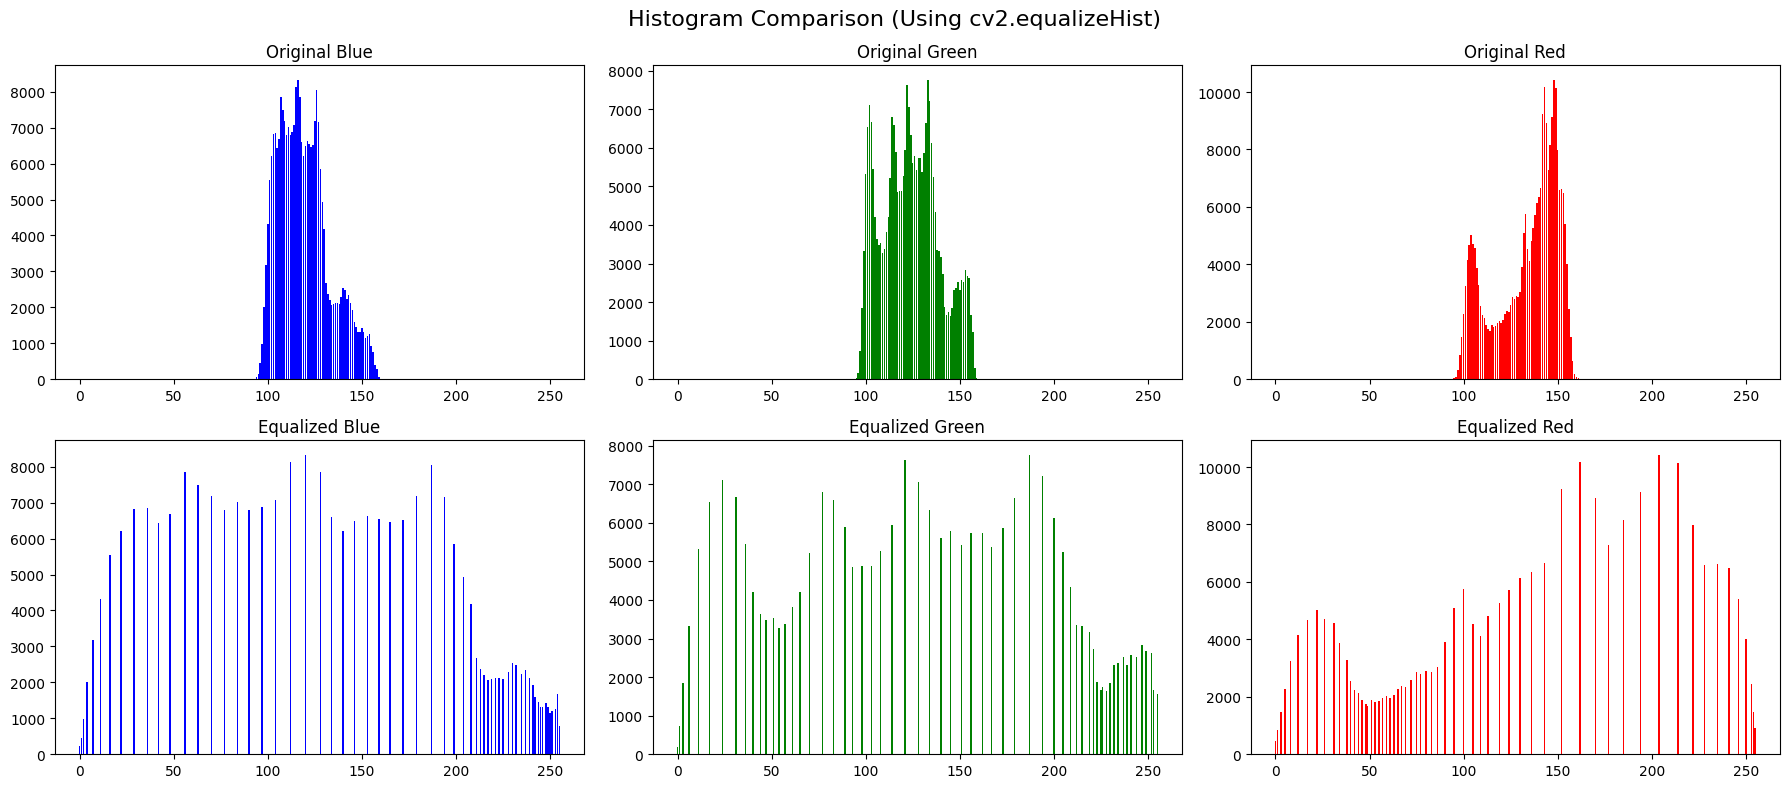

In [ ]:

img_lc2 = cv.imread('/content/drive/MyDrive/PCVK/Image/lena_lc.jpg')
b, g, r = cv.split(img_lc2)

b_equalized = cv.equalizeHist(b)
g_equalized = cv.equalizeHist(g)
r_equalized = cv.equalizeHist(r)

img_equalized_cv = cv.merge((b_equalized, g_equalized, r_equalized))

final_frame = cv.hconcat((img_lc2, img_equalized_cv))
print("Original Image (Left) vs. Equalized Image using cv2.equalizeHist (Right):")
cv2_imshow(final_frame)


hist_b_lc = cv.calcHist([b], [0], None, [256], [0, 256])
hist_g_lc = cv.calcHist([g], [0], None, [256], [0, 256])
hist_r_lc = cv.calcHist([r], [0], None, [256], [0, 256])


hist_b_eq = cv.calcHist([b_equalized], [0], None, [256], [0, 256])
hist_g_eq = cv.calcHist([g_equalized], [0], None, [256], [0, 256])
hist_r_eq = cv.calcHist([r_equalized], [0], None, [256], [0, 256])

plt.figure(figsize=(18, 8))
plt.suptitle('Histogram Comparison (Using cv2.equalizeHist)', fontsize=16)


plt.subplot(2, 3, 1); plt.bar(range(256), hist_b_lc.flatten(), color='b'); plt.title('Original Blue')
plt.subplot(2, 3, 2); plt.bar(range(256), hist_g_lc.flatten(), color='g'); plt.title('Original Green')
plt.subplot(2, 3, 3); plt.bar(range(256), hist_r_lc.flatten(), color='r'); plt.title('Original Red')


plt.subplot(2, 3, 4); plt.bar(range(256), hist_b_eq.flatten(), color='b'); plt.title('Equalized Blue')
plt.subplot(2, 3, 5); plt.bar(range(256), hist_g_eq.flatten(), color='g'); plt.title('Equalized Green')
plt.subplot(2, 3, 6); plt.bar(range(256), hist_r_eq.flatten(), color='r'); plt.title('Equalized Red')

plt.tight_layout()
plt.show()

Original Image vs. 8-Color Mapped Image


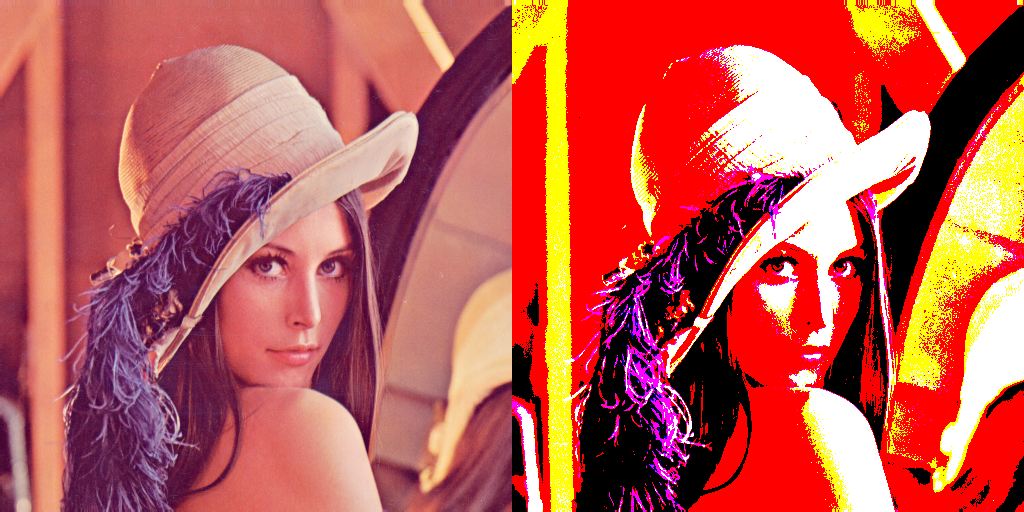

In [ ]:
img3 = cv.imread('/content/drive/MyDrive/PCVK/Image/Lenna_(test_image).png')

palette = {
    'black':   (0, 0, 0),
    'white':   (255, 255, 255),
    'red':     (0, 0, 255),
    'green':   (0, 255, 0),
    'blue':    (255, 0, 0),
    'yellow':  (0, 255, 255),
    'cyan':    (255, 255, 0),
    'magenta': (255, 0, 255)
}
palette_colors = np.array(list(palette.values()), dtype='int')


output_img = np.zeros(img3.shape, dtype='uint8')


height, width, _ = img3.shape


for y in range(height):
  for x in range(width):
    original_color = img3[y, x].astype(int)

    distances = np.sum((palette_colors - original_color)**2, axis=1)

    closest_color_index = np.argmin(distances)

    output_img[y, x] = palette_colors[closest_color_index]

final_frame = cv.hconcat((img3, output_img))
print("Original Image vs. 8-Color Mapped Image")
cv2_imshow(final_frame)

Original Grayscale Image vs. Dithered Image


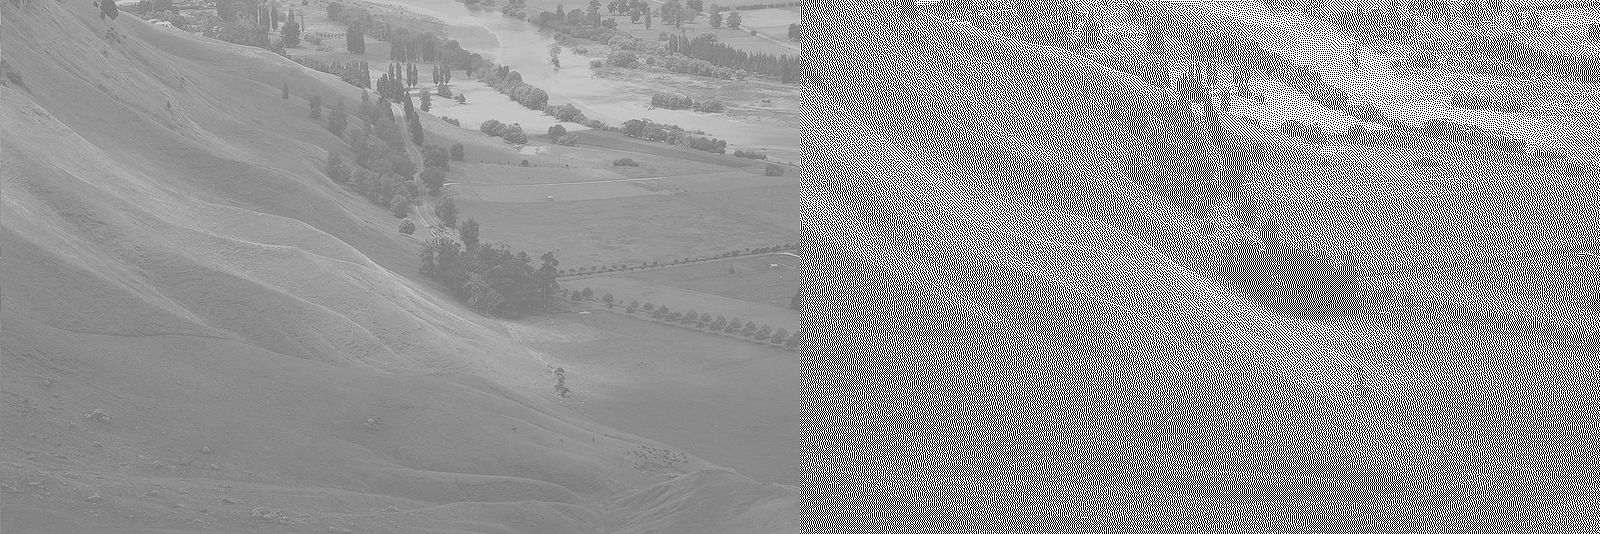

In [ ]:
img4 = cv.imread('/content/drive/MyDrive/PCVK/Image/wiki.jpg')
gray_img1 = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

dither_img = gray_img1.astype(np.float32)

height, width = dither_img.shape

for y in range(height):
  for x in range(width):
    old_pixel = dither_img[y, x]
    new_pixel = 255 if old_pixel > 128 else 0

    dither_img[y, x] = new_pixel
    quant_error = old_pixel - new_pixel

    if (x + 1) < width:
      dither_img[y, x + 1] += quant_error * 7 / 16
    if (x - 1) >= 0 and (y + 1) < height:
      dither_img[y + 1, x - 1] += quant_error * 3 / 16
    if (y + 1) < height:
      dither_img[y + 1, x] += quant_error * 5 / 16
    if (x + 1) < width and (y + 1) < height:
      dither_img[y + 1, x + 1] += quant_error * 1 / 16

dither_img = dither_img.astype(np.uint8)


final_frame = cv.hconcat((gray_img1, dither_img))
print("Original Grayscale Image vs. Dithered Image")
cv2_imshow(final_frame)